In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
import pandas as pd
data_set = '/content/drive/MyDrive/Introduction to ML project/External AQI.xlsx'
df = pd.read_excel(data_set)
print(df)

In [ ]:
#pre processing remiving manually calculated entries
#df[df['Unnamed: 3'] == "MANNUALLY CALCULATED"]
#df = df.drop(df[df['Unnamed: 3'] == "MANNUALLY CALCULATED"].index)
#df[df['Unnamed: 3'] == "MANNUALLY CALCULATED"] #All the rows which were manually calculated are deleted

In [ ]:
#Finding duplicates in date column
print(df[df['DATE'].duplicated()]) #as the datatype has been automatically changed to timestamp it does not condsider the changes in time and mark them as duplicate.

In [ ]:
# Extract the time using the `time` accessor:
df['TIME'] = pd.to_datetime(df['DATE']).dt.time
# Extract the date using the `to_datetime()` method and `date` accessor:
df['DATE'] = pd.to_datetime(df['DATE']).dt.date

In [ ]:
#Imputing all the null values with 0
df['PM2.5 (µg/m3)'] = df['PM2.5 (µg/m3)'].fillna(0)
df['PM10 (µg/m3)'] = df['PM10 (µg/m3)'].fillna(0)

<span style="font-size: 300px;"><b>Have to complete replacing duplicate values with averages

At the end of preprocessing have to drop the Unnamed: 3 columns </b></span>




In [ ]:
df['DATE'] = pd.to_datetime(df['DATE']) #changing the format to datetime.

In [ ]:
df.dtypes

In [ ]:
#Dividing the dataframe
df_1 = df[:150][:] # before time stamp data
df_2 = df[150:][:]  #Time stamp data

In [ ]:
df_1 = df_1.drop_duplicates(subset=["DATE"], keep='first') #removing the second copy of date , because it is manually calculated

In [ ]:
S1 = df_2.groupby('DATE')['PM2.5 (µg/m3)'].mean() # series of average of column pm2.5
S2 = df_2.groupby('DATE')['PM10 (µg/m3)'].mean() # series of average of column pm 10

In [ ]:
df_2['PM2.5 (µg/m3)'] = df_2['DATE'].map(S1)

In [ ]:
df_2['PM10 (µg/m3)'] = df_2['DATE'].map(S2)

In [ ]:
df_2 = df_2.drop_duplicates(subset=["DATE"], keep='first')

In [ ]:
df_1.drop(['TIME'], axis=1,inplace =True)
df_2.drop(['TIME'], axis=1 ,inplace=True)
df_1.drop(['Unnamed: 3'], axis=1,inplace =True)
df_2.drop(['Unnamed: 3'], axis=1 ,inplace=True)

In [ ]:
Final_df = pd.concat([df_1,df_2])

In [ ]:
Final_df

In [ ]:
#drop row 0 with Nan
Final_df = Final_df.drop(0)

In [ ]:
#drop row 0 with Nan
Final_df = Final_df.drop(80)

In [ ]:
#Resetting the index
Final_df = Final_df.reset_index(drop = 'TRUE')
print(Final_df)

In [ ]:
# Convert 'DATE' column to datetime format
Final_df['DATE'] = pd.to_datetime(Final_df['DATE'])

In [ ]:
# Use 'DATE' as a numerical feature (day of the year in this case)
Final_df['DAY_OF_YEAR'] = Final_df['DATE'].dt.dayofyear

In [ ]:
# Split the data into features (X) and target variables (y)
X = Final_df[['DAY_OF_YEAR']]
y_pm25 = Final_df['PM2.5 (µg/m3)']
y_pm10 = Final_df['PM10 (µg/m3)']

In [ ]:
y_pm25.fillna(y_pm25.mean(), inplace=True)
y_pm10.fillna(y_pm10.mean(), inplace=True)

In [ ]:
rows_with_nan = Final_df[Final_df['DATE'].isna()]
print(rows_with_nan)

R-squared for PM2.5: 66.5660163020134
R-squared for PM10: 55.482975760716876
MSE for PM2.5: 4431.034526319913
MSE for PM10: 3078.3605992642965


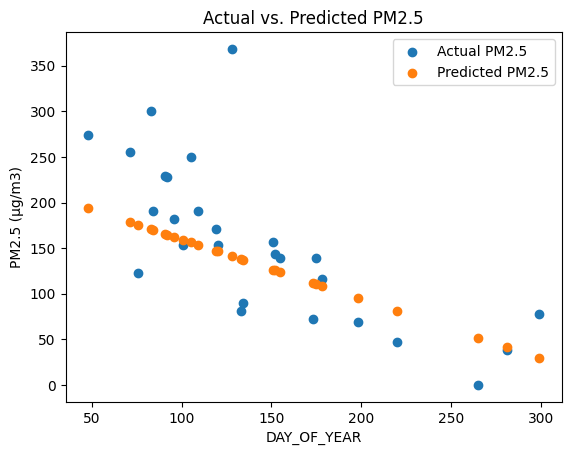

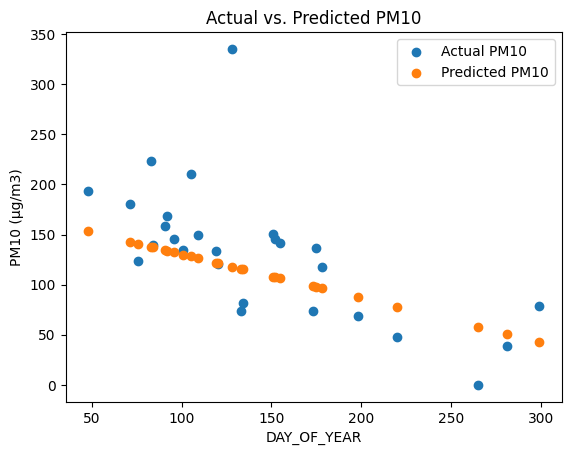

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_pm25_train, y_pm25_test, y_pm10_train, y_pm10_test = train_test_split(
    X, y_pm25, y_pm10, test_size=0.2, random_state=42
)

# Train linear regression models
model_pm25 = LinearRegression()
model_pm25.fit(X_train, y_pm25_train)

model_pm10 = LinearRegression()
model_pm10.fit(X_train, y_pm10_train)

# Make predictions
y_pm25_pred = model_pm25.predict(X_test)
y_pm10_pred = model_pm10.predict(X_test)

# Evaluate the models
mse_pm25 = mean_squared_error(y_pm25_test, y_pm25_pred)
mse_pm10 = mean_squared_error(y_pm10_test, y_pm10_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse_pm25 = np.sqrt(mse_pm25)
rmse_pm10 = np.sqrt(mse_pm10)


print(f'R-squared for PM2.5: {rmse_pm25}')
print(f'R-squared for PM10: {rmse_pm10}')

# Print the Mean Squared Error (MSE)
print(f'MSE for PM2.5: {mse_pm25}')
print(f'MSE for PM10: {mse_pm10}')

# Plot the actual vs. predicted values
plt.scatter(X_test, y_pm25_test, label='Actual PM2.5')
plt.scatter(X_test, y_pm25_pred, label='Predicted PM2.5')
plt.legend()
plt.xlabel('DAY_OF_YEAR')
plt.ylabel('PM2.5 (µg/m3)')
plt.title('Actual vs. Predicted PM2.5')
plt.show()

plt.scatter(X_test, y_pm10_test, label='Actual PM10')
plt.scatter(X_test, y_pm10_pred, label='Predicted PM10')
plt.legend()
plt.xlabel('DAY_OF_YEAR')
plt.ylabel('PM10 (µg/m3)')
plt.title('Actual vs. Predicted PM10')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
Final_df# Train decision tree models
model_pm25 = DecisionTreeRegressor(random_state=42)
model_pm25.fit(X_train, y_pm25_train)

model_pm10 = DecisionTreeRegressor(random_state=42)
model_pm10.fit(X_train, y_pm10_train)

# Make predictions
y_pm25_predd = model_pm25.predict(X_test)
y_pm10_predd = model_pm10.predict(X_test)

# Evaluate the models
mse_pm25d = mean_squared_error(y_pm25_test, y_pm25_predd)
mse_pm10d = mean_squared_error(y_pm10_test, y_pm10_predd)

# Calculate the Root Mean Squared Error (RMSE)
rmse_pm25d = np.sqrt(mse_pm25d)
rmse_pm10d = np.sqrt(mse_pm10d)

# Print the RMSE
print(f'RMSE for PM2.5: {rmse_pm25d}')
print(f'RMSE for PM10: {rmse_pm10d}')

# Print the Mean Squared Error (MSE)
print(f'MSE for PM2.5: {mse_pm25d}')
print(f'MSE for PM10: {mse_pm10d}')

# Plot the actual vs. predicted values
plt.scatter(X_test, y_pm25_test, label='Actual PM2.5')
plt.scatter(X_test, y_pm25_predd, label='Predicted PM2.5')
plt.legend()
plt.xlabel('DAY_OF_YEAR')
plt.ylabel('PM2.5 (µg/m3)')
plt.title('Actual vs. Predicted PM2.5')
plt.show()

plt.scatter(X_test, y_pm10_test, label='Actual PM10')
plt.scatter(X_test, y_pm10_predd, label='Predicted PM10')
plt.legend()
plt.xlabel('DAY_OF_YEAR')
plt.ylabel('PM10 (µg/m3)')
plt.title('Actual vs. Predicted PM10')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:

# Train KNN models with different metrics
metrics = ['euclidean', 'manhattan', 'chebyshev']

for metric in metrics:
    print(f"\nMetrics: {metric}")

    # Train KNN models
    knn_pm25 = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_pm25.fit(X_train, y_pm25_train)

    knn_pm10 = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_pm10.fit(X_train, y_pm10_train)

    # Make predictions
    y_pm25_predk = knn_pm25.predict(X_test)
    y_pm10_predk = knn_pm10.predict(X_test)

    # Evaluate the models
    mse_pm25k = mean_squared_error(y_pm25_test, y_pm25_predk)
    mse_pm10k = mean_squared_error(y_pm10_test, y_pm10_predk)
    mae_pm25k = mean_absolute_error(y_pm25_test, y_pm25_predk)
    mae_pm10k = mean_absolute_error(y_pm10_test, y_pm10_predk)
    r2_pm25k = r2_score(y_pm25_test, y_pm25_predk)
    r2_pm10k = r2_score(y_pm10_test, y_pm10_predk)

    # Print evaluation metrics
    print(f'MSE for PM2.5: {mse_pm25k}')
    print(f'MSE for PM10: {mse_pm10k}')
    print(f'MAE for PM2.5: {mae_pm25k}')
    print(f'MAE for PM10: {mae_pm10k}')
    print(f'R-squared for PM2.5: {r2_pm25k}')
    print(f'R-squared for PM10: {r2_pm10k}')

    # Plot the actual vs. predicted values
    plt.scatter(X_test, y_pm25_test, label='Actual PM2.5')
    plt.scatter(X_test, y_pm25_predk, label='Predicted PM2.5')
    plt.legend()
    plt.xlabel('DAY_OF_YEAR')
    plt.ylabel('PM2.5 (µg/m3)')
    plt.title(f'Actual vs. Predicted PM2.5 - Metric: {metric}')
    plt.show()

    plt.scatter(X_test, y_pm10_test, label='Actual PM10')
    plt.scatter(X_test, y_pm10_predk, label='Predicted PM10')
    plt.legend()
    plt.xlabel('DAY_OF_YEAR')
    plt.ylabel('PM10 (µg/m3)')
    plt.title(f'Actual vs. Predicted PM10 - Metric: {metric}')
    plt.show()

In [ ]:
import xgboost as xgb

RMSE for PM2.5: 101.01159314515722
RMSE for PM10: 87.56010026871566
MSE for PM2.5: 10203.341949722773
MSE for PM10: 7666.771159067539


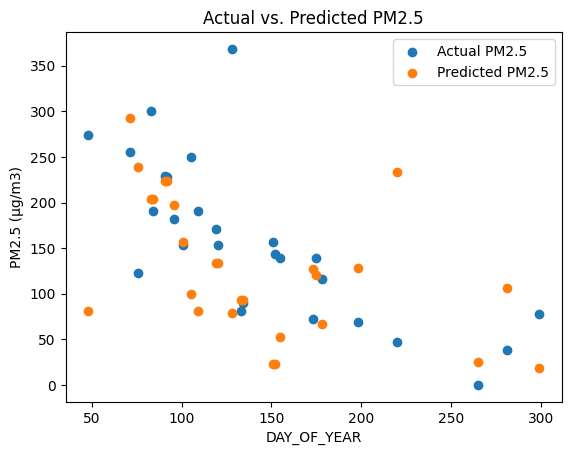

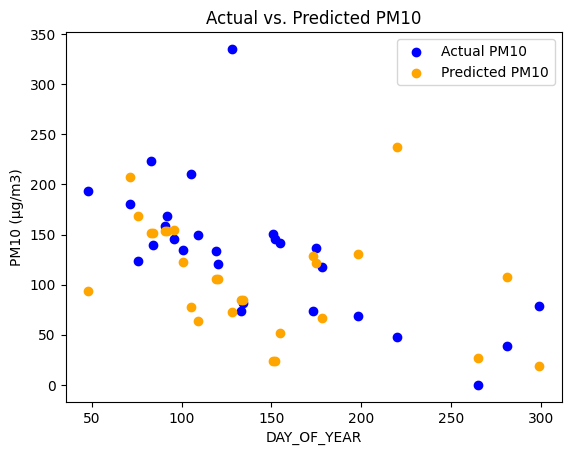

In [ ]:

# XGBoost for PM2.5
xgb_pm25 = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100)
xgb_pm25.fit(X_train, y_pm25_train)

# XGBoost for PM10
xgb_pm10 = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100)
xgb_pm10.fit(X_train, y_pm10_train)

# Make predictions
y_pm25_predx = xgb_pm25.predict(X_test)
y_pm10_predx = xgb_pm10.predict(X_test)

# Evaluate the models
mse_pm25x = mean_squared_error(y_pm25_test, y_pm25_predx)
mse_pm10x = mean_squared_error(y_pm10_test, y_pm10_predx)

# Calculate the Root Mean Squared Error (RMSE)
rmse_pm25x = np.sqrt(mse_pm25x)
rmse_pm10x = np.sqrt(mse_pm10x)

# Print the RMSE
print(f'RMSE for PM2.5: {rmse_pm25x}')
print(f'RMSE for PM10: {rmse_pm10x}')

# Print the Mean Squared Error (MSE)
print(f'MSE for PM2.5: {mse_pm25x}')
print(f'MSE for PM10: {mse_pm10x}')

# Plot the actual vs. predicted values
plt.scatter(X_test, y_pm25_test, label='Actual PM2.5', marker = 'o')
plt.scatter(X_test, y_pm25_predx, label='Predicted PM2.5', marker = 'o')
plt.legend()
plt.xlabel('DAY_OF_YEAR')
plt.ylabel('PM2.5 (µg/m3)')
plt.title('Actual vs. Predicted PM2.5')
plt.show()

plt.scatter(X_test, y_pm10_test, label='Actual PM10', marker = 'o', color = 'blue')
plt.scatter(X_test, y_pm10_predx, label='Predicted PM10', marker = 'o', color = 'orange')
plt.legend()
plt.xlabel('DAY_OF_YEAR')
plt.ylabel('PM10 (µg/m3)')
plt.title('Actual vs. Predicted PM10')
plt.show()



In [ ]:

# Calculate the Root Mean Squared Error (RMSE)
rmse_pm25x = np.sqrt(mse_pm25x)
rmse_pm10x = np.sqrt(mse_pm10x)

print("The root mean squared error of the predictions is: %.2f" % rmse_pm25x,"For pm 2.5")
print("The root mean squared error of the predictions is: %.2f" % rmse_pm10x,"For pm 2.5")

The root mean squared error of the predictions is: 69.19 For pm 2.5
The root mean squared error of the predictions is: 59.40 For pm 10


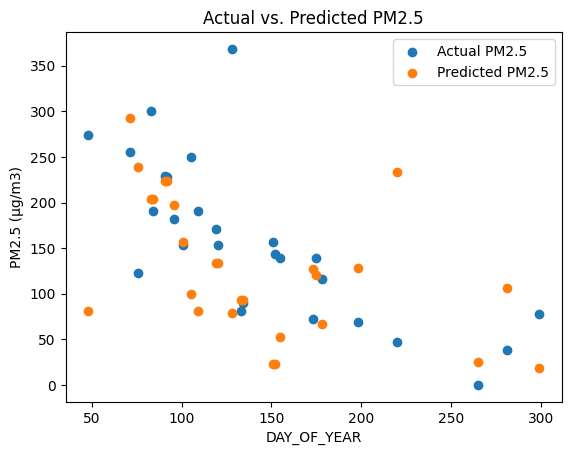

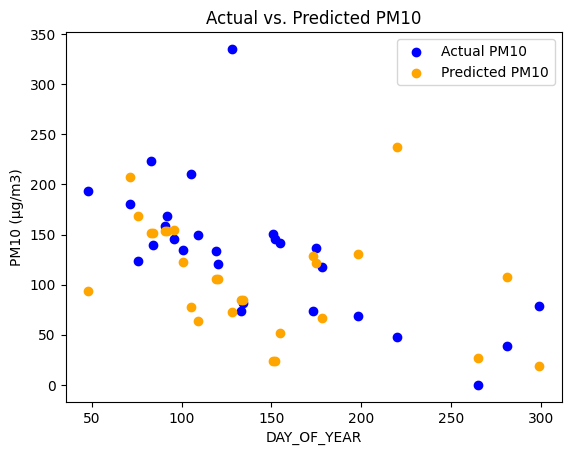

In [ ]:
#Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#pm_25
# Fit RandomForestRegressor to the training set
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_pm25_train)

# Predict on the test set
y_pred = regr.predict(X_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_pm25_test, y_pred))
print("The root mean squared error of the predictions is: %.2f" % rmse,"For pm 2.5")

#pm_10
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_pm10_train)

# Predict on the test set
y_pred = regr.predict(X_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_pm10_test, y_pred))
print("The root mean squared error of the predictions is: %.2f" % rmse,"For pm 10")

# Plot the actual vs. predicted values
plt.scatter(X_test, y_pm25_test, label='Actual PM2.5', marker = 'o')
plt.scatter(X_test, y_pm25_predx, label='Predicted PM2.5', marker = 'o')
plt.legend()
plt.xlabel('DAY_OF_YEAR')
plt.ylabel('PM2.5 (µg/m3)')
plt.title('Actual vs. Predicted PM2.5')
plt.show()

plt.scatter(X_test, y_pm10_test, label='Actual PM10', marker = 'o', color = 'blue')
plt.scatter(X_test, y_pm10_predx, label='Predicted PM10', marker = 'o', color = 'orange')
plt.legend()
plt.xlabel('DAY_OF_YEAR')
plt.ylabel('PM10 (µg/m3)')
plt.title('Actual vs. Predicted PM10')
plt.show()

